# What's new since last year's UGM?
# 2018 RDKit UGM Edition

Not an exhaustive list, just some examples. Covers 2017.09, 2018.03, and some of the forthcoming 2018.09 release.

## Contributors

Not an exhaustive list, covers people who have been acknowledged in the release notes of recent versions or who have contributed code or bug reports to the upcoming release. 
<table><tr><td>
    <ul>
<li>'clinntt'
<li>'hjuinj'
<li>'iwatobipen'
<li>'jaechanglim'
<li>'phenethyl'
<li>'xiaotaw'
<li>Alain Vaucher
<li>Andrew Dalke
<li>Axel Pahl
<li>Boran Adas
<li>Brian Cole
<li>Brian Kelley
<li>Brian Cole
<li>Cameron Pye
    </ul>
    </td><td>
    <ul>
<li>Chris Morris
<li>Christian Ribeaud
<li>Dan Nealschneider
<li>Francois Berenger
<li>Gareth Jones
<li>Gregor Simm
<li>Guillaume Godin
<li>JW Feng
<li>Jan Halborg Jensen
<li>Jason Biggs
<li>Jeff van Santen
<li>Jon Sorenson
<li>Josh Meyers
<li>José Emilio Sánchez Aparicio
    </ul>
    </td><td>
    <ul>
<li>Karl Leswing
<li>Maciej Wójcikowski
<li>Malitha Kabir
<li>Martin Šícho
<li>Matt Swain
<li>Matthew O'Meara
<li>Nadine Schneider
<li>Nicola Zonta
<li>Noel O'Boyle
<li>Paolo Tosco
<li>Patrick Avery
<li>Paulo Tosco
<li>Pavel Polishchuk
<li>Peter Gedeck
    </ul>
    </td><td>
    <ul>
<li>Richard Hall
<li>Rim Shayakhmetov
<li>Roger Sayle
<li>Sam Webb
<li>Sereina Riniker
<li>Stephen Roughley
<li>Susan Leung
<li>Thomas Blaschke
<li>Thomas Heavy
<li>Tuomo Kalliokoski
    </ul>
    </td></tr></table>

## Big code changes

### Modern C++ 
(Release 2018.03)

Move to using C++14 (mostly) for the core. In addition to making developers' lives more pleasant, this has resulted in a nice performance boost and reduced memory requirements.

As a little example of how much this changes things, here's what looping over atoms in the molecule used to require:
```
  ROMol::VERTEX_ITER this_at, end_at;
  boost::tie(this_at, end_at) = mol.getVertices();
  while (this_at != end_at) {
    const Atom *atom = mol[*this_at].get();
    ++this_at;
    <do something with the atom>
  }
```
and here's what it looks like now:
```
  for (const auto atom : mol.atoms()) {
    <do something with the atom>
  }
```
the improvement is hopefully obvious even if you don't know C++. :-)

### Sensible defaults
(Release 2018.03)

We made a series of changes to the default values of arguments to RDKit functions in order to make using the toolkit less error prone.

- `MolToSmiles()` now generates isomeric SMILES by default.
- The embedding code now uses the ETKDG method by default. **Note** this is not yet true from Python.
- `MolToMolBlock()` will now by default generate a set of 2D coordinates for
  molecules when the includeStereo option is set to True. The changes are made
  to a copy of the molecule; the molecule itself will not be modified.
- The Mol file (and SDF) parser now determines atomic stereochemisty based on
  the 3D coordinates provided (if 3D coordinates are provided).
- The SMILES parser now supports CXSMILES by default (assuming that additional
  text that looks like CXSMILES extensions is there).



### Other backwards incompatible changes
(Ongoing)

We've started to gradually make other changes to the code that may be either backwards incompatible or may change the default results. These will be documented in a section of the release notes and are tagged with `Changes Results` in github.

Here's an example from the (upcoming) 2019.09 release notes:
```
## Backwards incompatible changes
This release includes a set of changes to make the default arguments to common
functions less error prone (github #1679).
- GetAtomSmiles() now generates isomeric SMILES by default.
- The ringMatchesRingOnly option to the FindMCS() function now applies to
  atom-atom matches as well as bond-bond matches. 
```

### Move from epydoc to sphinx autodoc (affects documentation)
(Release 2018.09)

epydoc is no longer maintained and does not work with Python 3. Sphinx autodoc is under active development, integrates better with the rest of the RDKit documentation system, and looks better. Unfortunately some documentation needs to be reformatted in order to look good; this may take another release. *You* can help here!


## New Features

 - [Coordgen integration](#Coordgen-integration)
 - [Bit visualization](#Fingerprint-bit-visualization)
 - [Molecular interchange format](#Molecular-interchange-format)
 - [3D Descriptors](#3D-Descriptors)
 - [SVGs with chemical metadata](#SVGs-with-chemical-metadata)
 
 
Some for which the PR is still being reviewed:

 - Reading/writing extended stereochemistry from v3000 mol blocks
 - MolVS integration (GSoC project, more on this from Susan later)
 - Generalized fingerprinter (GSoC project, more on this from Boran later)
 
Hopefully these will also make it into the 2019.09 release


## Coordgen integration 
(2018.03 release)

This allows the coordgen library from Nicola Zonta (Schroedinger) to be used to generate 2D coordinates in the RDKit.

In [1]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import IPythonConsole

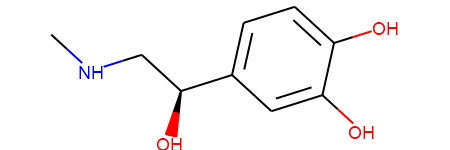

In [2]:
epinephrine = Chem.MolFromSmiles('CNC[C@H](O)c1ccc(O)c(O)c1')
epinephrine

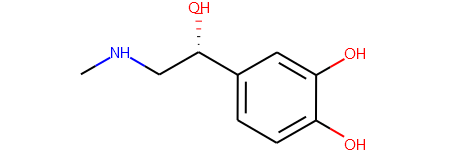

In [3]:
rdDepictor.SetPreferCoordGen(True)
rdDepictor.Compute2DCoords(epinephrine)
epinephrine

Something harder:

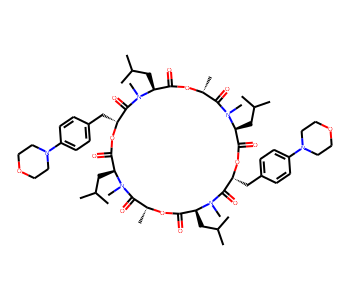

In [4]:
IPythonConsole.molSize = (350,300)
emodepside = Chem.MolFromSmiles('CC(C)C[C@H]1C(=O)O[C@H](Cc2ccc(N3CCOCC3)cc2)C(=O)N(C)[C@@H](CC(C)C)C(=O)O[C@H](C)C(=O)N(C)[C@@H](CC(C)C)C(=O)O[C@H](Cc2ccc(N3CCOCC3)cc2)C(=O)N(C)[C@@H](CC(C)C)C(=O)O[C@H](C)C(=O)N1C')
rdDepictor.SetPreferCoordGen(False)
rdDepictor.Compute2DCoords(emodepside)
emodepside

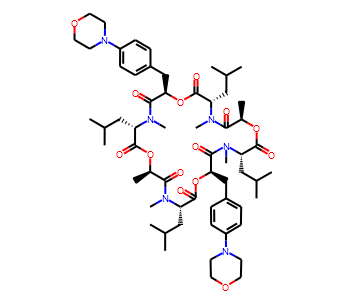

In [5]:
rdDepictor.SetPreferCoordGen(True)
rdDepictor.Compute2DCoords(emodepside)
emodepside

## Fingerprint bit visualization 
(2018.09 release)

Nadine Schneider's fingerprint bit visualization code from [CheTo](https://github.com/rdkit/CheTo) has been adapted and added to the RDKit core.

*Note*: At the moment this code is still in Python. It will be ported to C++ in a future release to allow it to be used more broadly.

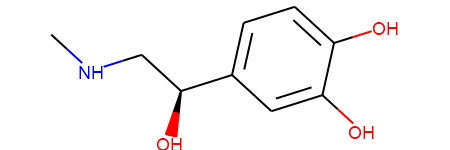

In [49]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
epinephrine = Chem.MolFromSmiles('CNC[C@H](O)c1ccc(O)c(O)c1')
epinephrine

In [50]:
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(epinephrine, radius=2, bitInfo=bi)
list(fp.GetOnBits())[:10]

[1, 80, 227, 315, 589, 606, 632, 807, 875, 1057]

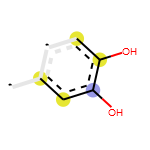

In [51]:
Draw.DrawMorganBit(epinephrine,589,bi)

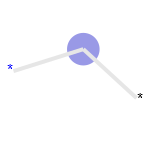

In [36]:
Draw.DrawMorganBit(epinephrine,80,bi)

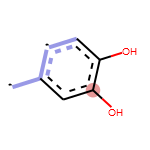

In [37]:
Draw.DrawMorganBit(epinephrine,589,bi,aromaticColor=None,ringColor=None,extraColor=(.6,.6,.9),centerColor=(.9,.6,.6))

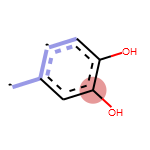

In [38]:
Draw.DrawMorganBit(epinephrine,589,bi,aromaticColor=None,ringColor=None,extraColor=(.6,.6,.9),centerColor=(.9,.6,.6),baseRad=0.6)

In [39]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(epinephrine, maxPath=5, bitInfo=rdkbi)
list(rdkfp.GetOnBits())[:10]

[93, 103, 112, 122, 148, 149, 161, 166, 194, 208]

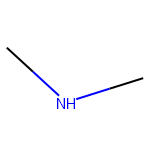

In [40]:
Draw.DrawRDKitBit(epinephrine,166,rdkbi)

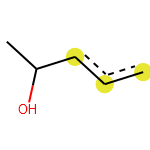

In [41]:
Draw.DrawRDKitBit(epinephrine,222,rdkbi)

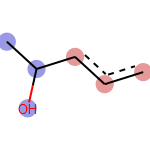

In [42]:
Draw.DrawRDKitBit(epinephrine,222,rdkbi,aromaticColor=(.9,.6,.6),nonAromaticColor=(.6,.6,.9))

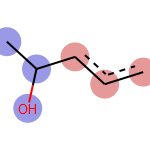

In [43]:
Draw.DrawRDKitBit(epinephrine,222,rdkbi,aromaticColor=(.9,.6,.6),nonAromaticColor=(.6,.6,.9),baseRad=.5)

In [52]:
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))


In [53]:
interact(renderFpBit, bitIdx=list(bi.keys()),mol=fixed(epinephrine),bitInfo=fixed(bi),fn=fixed(Draw.DrawMorganBit));

interactive(children=(Dropdown(description='bitIdx', options=(1, 80, 227, 315, 589, 606, 632, 807, 875, 1057, 1152, 1362, 1365, 1367, 1380, 1430, 1434, 1475, 1602, 1607, 1750, 1784, 1853, 1868, 1873, 1995), value=1), Output()), _dom_classes=('widget-interact',))

In [46]:
interact(renderFpBit, bitIdx=list(rdkbi.keys()),mol=fixed(epinephrine),bitInfo=fixed(rdkbi),fn=fixed(Draw.DrawRDKitBit));

interactive(children=(Dropdown(description='bitIdx', options=(103, 148, 166, 222, 277, 313, 330, 353, 397, 412, 441, 461, 471, 508, 525, 562, 587, 588, 608, 648, 661, 670, 704, 728, 767, 792, 824, 825, 826, 849, 854, 886, 921, 930, 1026, 1064, 1166, 1183, 1224, 1251, 1261, 1342, 1370, 1371, 1379, 1423, 1448, 1456, 1501, 1513, 1553, 1577, 1646, 1649, 1688, 1772, 1780, 1784, 1816, 1909, 1941, 1982, 1996, 2021, 2025, 2026, 2047), value=103), Output()), _dom_classes=('widget-interact',))

## Molecular interchange format
(2018.03 release)

A JSON-based format derived from [CommonChem](https://github.com/CommonChem/CommonChem) for exchanging information about molecules between software packages.

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolInterchange
import json

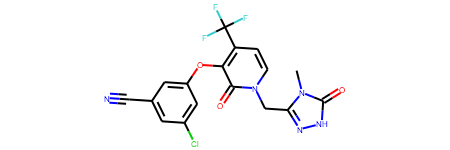

In [4]:
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
doravirine

In [5]:
mjson = rdMolInterchange.MolToJSON(doravirine)
print(json.dumps(json.loads(mjson),indent=4))

{
    "commonchem": {
        "version": 10
    },
    "defaults": {
        "atom": {
            "z": 6,
            "impHs": 0,
            "chg": 0,
            "nRad": 0,
            "isotope": 0,
            "stereo": "unspecified"
        },
        "bond": {
            "bo": 1,
            "stereo": "unspecified"
        }
    },
    "molecules": [
        {
            "atoms": [
                {
                    "impHs": 3
                },
                {
                    "z": 7
                },
                {},
                {
                    "z": 7
                },
                {
                    "z": 7,
                    "impHs": 1
                },
                {},
                {
                    "z": 8
                },
                {
                    "impHs": 2
                },
                {
                    "z": 7
                },
                {
                    "impHs": 1
                },
           

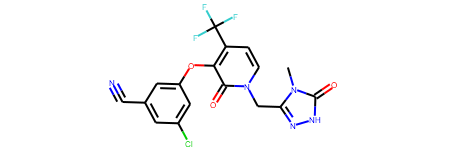

In [8]:
nmol = rdMolInterchange.JSONToMols(mjson)[0]
nmol

In [9]:
Chem.MolToSmiles(nmol)==Chem.MolToSmiles(doravirine)

True

## 3D Descriptors 
(2017.09 release)

In [54]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors3D

In [55]:
doravirine = Chem.AddHs(Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F'))
ps = AllChem.ETKDGv2()
ps.randomSeed = 0xf00d
AllChem.EmbedMolecule(doravirine,ps)
IPythonConsole.drawMol3D(doravirine)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Dragon-type descriptors:

In [4]:
print("AutoCorr3D:",len(rdMolDescriptors.CalcAUTOCORR3D(doravirine)))
print("Morse:",len(rdMolDescriptors.CalcMORSE(doravirine)))
print("RDF:",len(rdMolDescriptors.CalcRDF(doravirine)))
print("WHIM:",len(rdMolDescriptors.CalcWHIM(doravirine)))
print("GETAWAY:",len(rdMolDescriptors.CalcGETAWAY(doravirine)))

AutoCorr3D: 80
Morse: 224
RDF: 210
WHIM: 114
GETAWAY: 273


Note that a collection of principal moment descriptors is also available (these have been there for a while):

In [9]:
descrs = ('PBF','PMI1','PMI2','PMI3','NPR1','NPR2','RadiusOfGyration','InertialShapeFactor',
          'Eccentricity','Asphericity','SpherocityIndex')
for descr in descrs:
    calc_fn = getattr(rdMolDescriptors,'Calc%s'%descr)
    print(f"{descr} {calc_fn(doravirine):.4f}")


PBF 1.0255
PMI1 2794.9144
PMI2 4918.6167
PMI3 6542.7980
NPR1 0.4272
NPR2 0.7518
RadiusOfGyration 4.0918
InertialShapeFactor 0.0003
Eccentricity 0.9042
Asphericity 0.2086
SpherocityIndex 0.2543


## SVGs with chemical metadata

It's now possible to add some RDKit-specific metadata to the SVG output by the `MolDraw2DSVG` object and construct molecules from that data.

This is still beta level, and we can't guarantee backwards compatibility between releases (though we'll certainly try), but I'd love to get some feedback on whether or not it's useful.

In [56]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from IPython.display import SVG

In [57]:
doravirine = Chem.MolFromSmiles('Cn1c(n[nH]c1=O)Cn2ccc(c(c2=O)Oc3cc(cc(c3)Cl)C#N)C(F)(F)F')
ddoravirine = Draw.PrepareMolForDrawing(doravirine)

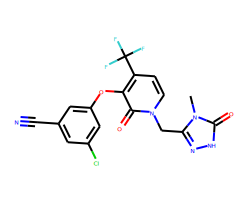

In [58]:
d = Draw.MolDraw2DSVG(250,200)
d.DrawMolecule(ddoravirine)
d.AddMoleculeMetadata(ddoravirine)
d.FinishDrawing()
svg = d.GetDrawingText()
SVG(svg)

In [59]:
print(svg)

<?xml version='1.0' encoding='iso-8859-1'?>
<svg version='1.1' baseProfile='full'
              xmlns='http://www.w3.org/2000/svg'
                      xmlns:rdkit='http://www.rdkit.org/xml'
                      xmlns:xlink='http://www.w3.org/1999/xlink'
                  xml:space='preserve'
width='250px' height='200px' >
<rect style='opacity:1.0;fill:#FFFFFF;stroke:none' width='250' height='200' x='0' y='0'> </rect>
<path d='M 190.464,96.0401 192.56,104.336' style='fill:none;fill-rule:evenodd;stroke:#000000;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />
<path d='M 192.56,104.336 194.656,112.632' style='fill:none;fill-rule:evenodd;stroke:#0000FF;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />
<path d='M 192.655,119.52 187.474,125.735' style='fill:none;fill-rule:evenodd;stroke:#0000FF;stroke-width:2px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1' />
<path d='M 187.474,125.735 182.293,131.949' style='fill:n

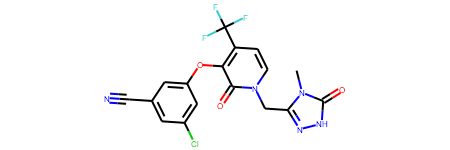

In [31]:
nm = Chem.MolFromRDKitSVG(svg)
nm.ClearComputedProps()
Chem.SanitizeMol(nm)
nm

In [32]:
Chem.MolToSmiles(nm) == Chem.MolToSmiles(doravirine)

True